# Приоритезация гипотез для увеличения выручки крупного интернет-магазина и Анализ результатов A/B-тестирования

**Описание:**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Исходные данные:**

В файле `***` - 9 гипотез по увеличению выручки интернет-магазина.

В файлах `***` и `***` - результаты проведенного A/B-теста.

**Цели:**

- Помочь заказчику увеличить выручку
    - Приоритизировать гипотезы
    - Провести анализ результатов A/B-тестирования
    
**Ход выполнения:**

- Приоритезируем гипотезы с помощью фреймвроков ICE и RICE
- Проанализируем результаты проведенного A/B-тестирования:
    - для этого рассчитаем и детально изучим следующие основные метрики для каждой из групп:
        - Кумулятивная выручка
        - Кумулятивный средний чек
        - Кумулятивная конверсия (кумулятивное среднее количество заказов на посетителя)

- Сформируем выводы

 
**Для достижения поставленных целей сделаем следующее:**
 

**Часть первая. Гипотезы:**
- Загрузим и опишем данные


- Проведем предобработку данных, если это необходимо


- Приоритезируем гипотезы:
    - Применим фреймворки ICE и RICE
    

- Сформируем выводы

**Часть вторая. Анализ A/B-тестирования:**

- Загрузим и опишем данные


- Проведем предобработку данных, если это необходимо


- Проанализируем результаты проведенного A/B-тестирования
    - Построим график кумулятивной выручки по группам
    - Построим график кумулятивного среднего чека по группам
    - Построим график относительного изменения кумулятивного среднего чека группы B к группе A
    - Построим график кумулятивного среднего количества заказов на посетителя по группам
    - Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
    - Построим точечный график количества заказов по пользователям
    - Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Определим границу для определения аномальных пользователей
    - Построим точечный график стоимостей заказов
    - Посчитаем 95-й и 99-й перцентили стоимости заказов. Определим границу для определения аномальных заказов
    - Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
    - Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
    - Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
    - Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
    - Примем решение по результатам теста
    
    
- Сформируем выводы

In [1]:
# импортируем библиотеки, которые понадобятся нам для решения поставленных задач
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import scipy.stats as stats

## Гипотезы
### Первый взляд на данные

Прочитаем файл `***` и ознакомимся с общей информацией о датасете методом `info()`

In [2]:
# сохраним данные в переменную 'hypothesis'
hypothesis = pd.read_csv('***')

# ознакомимся с общей информацией о датасете
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В датасете `hypothesis` представлены 9 строк и 5 колонок с данными, пропусков нет.

**Опишем данные:**

- `Hypothesis` — краткое описание гипотезы


- `Reach` — охват пользователей по 10-балльной шкале


- `Impact` — влияние на пользователей по 10-балльной шкале


- `Confidence` — уверенность в гипотезе по 10-балльной шкале


- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале


Изучим датасет `hypothesis`. Для полного отображения данных применим метод `pd.set_option()` с параметром `display.max_colwidth`

In [3]:
# выведем и изучим датасет 'hypothesis'
pd.set_option('display.max_colwidth', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В датасете представлена вся заявленная информация, при этом пропуски и дубликаты отсутствуют. Предобработка данных не нужна. Единственное что сделаем это приведем названия колонок к общепринятому виду - нижнему регистру.

In [4]:
# приведем наименование колонок в датасете 'hypothesis' к нижнему регистру
hypothesis.columns = map(str.lower, hypothesis.columns)

# посмотрим на результат
hypothesis.head(1)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6


#### Результаты обзора данных

- В нашем распоряжении датасет `hypothesis` хранит список гипотез для увеличения выручки с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`
- Параметры представлены значением по 10-ти бальной шкале
- В данных пропуски и дубликаты не обнаружены
- Приведено описание всех данных представленных в датасете
- Предобработка данных не требуется

### Приоритезация гипотез

Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса, сформулированные гипотезы необходимо приоритизировать. В нашем распоряжении есть данные для приоритезации гипотез с помощью фреймворков ICE и RICE.

Сделаем следующее:

- Вычислим параметр ICE по формуле `(impact * confidence) / efforts`
- Отсортируем гипотезы по приоритету (параметр ICE) от большего к меньшему

In [5]:
# рассчитываем параметр 'ICE' для каждой гипотезы и добавляем его в датасет
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)

# сортируем датасет по уменьшению параметра 'ICE'
ice_sorted_hypothesis = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

# выведем на экран отсортированные по приоритету гипотезы
ice_sorted_hypothesis

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По результатам приоритезации гипотез фреймворком ICE можно выделить наиболее приоритетные гипотезы для проверки:

- "**Запустить акцию, дающую скидку на товар в день рождения**", ICE - 16.2 гипотеза 9


- "**Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**", ICE - 13.33 гипотеза 1


- "**Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**", ICE - 11.2 гипотеза 8

Проверим сохранится ли приоритетность гипотез при применении фреймворка RICE (модифицированный ICE)

Сделаем следующее:

- Вычислим параметр RICE по формуле `(reach * impact * confidence) / efforts`
- Отсортируем гипотезы по приоритету (параметр RICE) от большего к меньшему

In [6]:
# рассчитываем параметр 'RICE' для каждой гипотезы и добавляем его в датасет
hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)

# сортируем датасет по уменьшению параметра 'RICE'
rice_sorted_hypothesis = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

# выведем на экран отсортированные по приоритету гипотезы
rice_sorted_hypothesis

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По результатам приоритезации гипотез фреймворком RICE можно выделить наиболее приоритетные гипотезы для проверки:

- "**Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**", RICE - 112 гипотеза 8


- "**Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа**", RICE - 56 гипотеза 3


- "**Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**", RICE - 40 гипотеза 1


- "**Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию**", RICE - 40 гипотеза 7

#### Результаты приоритезации гипотез


Результаты наиболее приоритетных гипотез для проверки ожидаемо изменились. Так из трех наиболее приоритетных гипотез по фрейморку ICE в наиболее приоритетные гипотезы по фреймворку RICE попали только две (гипотезы 1 и 8), и на первое место вышла гипотеза 8 (по фрейморку ICE она была на 3 месте по приоритету), а на второе место попала гипотеза 3.

Различия в приоритетах одинаковых гипотез заключаются в том, что фреймворк RICE в отличии от фреймворка ICE также учитывает параметр `reach` - охват пользователей, то есть размер доли пользователей, которых затронут изменения описанные в гипотезе. 

Например, гипотеза: **Запустить акцию, дающую скидку на товар в день рождения** единомоментно оказывает влияние только на небольшую часть пользователей, в то время как гипотеза: **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок** затронет абсолютно каждого пользователя как только изменения описанные в гипотезе будут приняты.

Объединив результаты оценок можно выделить следующую приоритезацию гипотез:

- "**Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**"


- "**Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа**"


- "**Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию**"


- "**Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**"


- "**Запустить акцию, дающую скидку на товар в день рождения**"

## Анализ A/B-тестирования
### Первый взляд на данные

В нашем распоряжении файлы `***`, который хранит информацию о заказах указанного пользователя в указанную дату в указанной группе A/B-теста, и `***`, который хранит количество пользователей в указанную дату в указанной группе A/B-теста.

In [7]:
# сохраним данные в переменные 'orders' и 'visitors' соответственно
orders = pd.read_csv('***')
visitors = pd.read_csv('***')

In [8]:
# с помощью функции df_info() ознакомимся с основной информацией в датасетах
def df_info(df):
    display(df.info())
    print(f'\n Количество пропусков в датасете: {df.isna().sum().sum()} \n')
    print(f'\n Количество полных дубликатов в датасете: {df.duplicated().sum()} \n')
    display(df.head())

In [9]:
# датасет 'orders'
df_info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None


 Количество пропусков в датасете: 0 


 Количество полных дубликатов в датасете: 0 



,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


В датасете `orders` представлены 1197 строк и 5 колонок с данными, пропусков нет

**Опишем данные в датасете `orders`:**


- `transactionId` — идентификатор заказа


- `visitorId` — идентификатор пользователя, совершившего заказ


- `date` — дата, когда был совершён заказ


- `revenue` — выручка заказа


- `group` — группа A/B-теста, в которую попал заказ



In [10]:
# датасет 'visitors'
df_info(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None


 Количество пропусков в датасете: 0 


 Количество полных дубликатов в датасете: 0 



,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


В датасете `visitors` представлены 62 строки и 3 колонки с данными, пропусков нет


**Опишем данные в датасете `visitors`:**


- `date` — дата


- `group` — группа A/B-теста


- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста


**Проверим параметры датасетов на их корректность:**


- параметр `revenue` датасета `orders` и параметр `visitiors` датасета `visitors` не должны быть отрицательными


- параметры `group` в обоих датасетах не должны содержать значений отличных от `A` и `B`


- интервалы дат в датасетах не должны отличаться друг от друга

In [11]:
# проверим минимальное значение 'revenue' в 'orders'
print(f"Минимальное значение выручки заказа в датасете orders: {orders['revenue'].min()}")

Минимальное значение выручки заказа в датасете orders: 50


In [12]:
# проверим минимальное значение 'visitors' в 'visitors'
print(f"Минимальное значение количества пользователей в датасете visitors: {visitors['visitors'].min()}")

Минимальное значение количества пользователей в датасете visitors: 361


In [13]:
# проверим уникальные значения параметра 'group' в датасете 'orders'
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [14]:
# проверим уникальные значения параметра 'group' в датасете 'visitors'
visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [15]:
# проверим интервал дат в датасете 'orders'
print(f"Данные в датасете orders охватывают период с {pd.to_datetime(orders['date']).dt.date.min()}"
       f" по {pd.to_datetime(orders['date']).dt.date.max()}")

Данные в датасете orders охватывают период с 2019-08-01 по 2019-08-31


In [16]:
# проверим интервал дат в датасете 'visitors'
print(f"Данные в датасете visitors охватывают период с {pd.to_datetime(visitors['date']).dt.date.min()}"
       f" по {pd.to_datetime(visitors['date']).dt.date.max()}")

Данные в датасете visitors охватывают период с 2019-08-01 по 2019-08-31


#### Результаты обзора данных

- В нашем распоряжении датасеты `orders`, который хранит информацию о заказах в указанной группе A/B-теста, и `visitors`, который хранит количество пользователей в указанной группе A/B-теста
- В данных пропуски не обнаружены
- Приведено описание всех данных представленных в датасетах
- Ошибок в данных не обнаружено
- Требуется приведение данных к общему виду

### Предобработка данных

Выполним следующие действия:
- Приведем названия колонок к общепринятому виду `snake_case`


- Изменим тип данных парметров `date` обоих датасетов на `datetime`

In [17]:
# посмотрим на названия колонок в датасете 'orders'
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [18]:
# 'transactionId' и 'visitorId' изменим на 'transaction_id' и 'visitor_id' соответственно
orders = orders.rename( 
 columns={ 
'transactionId': 'transaction_id', 
'visitorId': 'visitor_id' 
 } 
)

# посмотрим на результат
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [19]:
# посмотрим на названия колонок в датасете 'visitors'
visitors.columns

Index(['date', 'group', 'visitors'], dtype='object')

In [20]:
# изменим тип данных 'date' в 'orders' на 'datetime'
orders['date'] = pd.to_datetime(orders['date'])

In [21]:
# изменим тип данных 'date' в 'visitors' на 'datetime'
visitors['date'] = pd.to_datetime(visitors['date'])

#### Результаты предобработки данных


- Данные приведены к общему виду
- Параметры `date` приведены к типу данных `datetime` в обоих датасетах

### Анализ результатов A/B-теста

**Подготовка данных**

Суть A/B-теста в том чтобы разделить пользователей на две примерно равные группы. При этом попавший в одну из групп пользователь должен оставаться в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно. Поэтому перед расчетом комулятивных метрик проведем проверку данных. И если найдутся пользователи, которые попали в обе группы нам придется от них избавиться.

Для проверки используем функцию `intersect1d()` библиотеки Numpy, она вернет пересечение двух массивов, т.е. уникальные элементы, которые встречаются в обоих.

In [22]:
# попробуем найти пользователей, которые попали и в группу А и в группу B
un_users = (
    np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(),
                   orders.query('group == "B"')['visitor_id'].unique())
)

print(f"Количество пользователей, которые попали в обе группы A/B-теста: {len(un_users)}")
un_users

Количество пользователей, которые попали в обе группы A/B-теста: 58


array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830], dtype=int64)

Действительно в данных о заказах есть пользователи, которые попали и в группа A и в группу B. Скорее всего наша система не запомнила конкретных пользователей, уже совершивших заказ и при их повторном посещении сайта определяла их в случайную группу, не в ту, в которой они были ранее.

Вопрос в том, что **Эти пользователи были случайными аномалиями или их что-то связывает?**

Возможно эти пользователи были слишком активными: гораздо чаще заходили на наш сайт\совершали покупки чем другие пользователи и из-за этого наша система дала сбой или вовсе не была ориентирована на такую активность. 
Проверить эту гипотезу сейчас к сожалению невозможно, поэтому она остается только предположением. Но на всякий случай сохраним заказы "аномальных" пользователей отдельно

In [23]:
# сохраним заказы пользователей, попавших в обе группы отдельно
un_orders = orders[orders['visitor_id'].isin(un_users)]

# удалим заказы пользователей, которые попали в обе группы A/B-теста
orders = orders[~orders['visitor_id'].isin(un_users)]

# проведем проверку 
un_users = (
    np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(),
                   orders.query('group == "B"')['visitor_id'].unique())
)

print(f"Количество пользователей, которые попали в обе группы A/B-теста: {len(un_users)}")
un_users

Количество пользователей, которые попали в обе группы A/B-теста: 0


array([], dtype=int64)

Заказы пользователей были очищены от некорректных данных

Теперь проведем проверку на количество уникальных пользователей групп A и B:

In [24]:
# проверим сколько пользователей находится в группе A
group_A = len(orders.query('group == "A"')['visitor_id'].unique())
print(f"Количество уникальных пользователей группы 'A': {group_A}")

Количество уникальных пользователей группы 'A': 445


In [25]:
# проверим сколько пользователей находится в группе B
group_B = len(orders.query('group == "B"')['visitor_id'].unique())
print(f"Количество уникальных пользователей группы 'B': {group_B}")

Количество уникальных пользователей группы 'B': 528


In [26]:
# найдем разницу
print(f"Количество уникальных пользователей в группе 'B' на {(group_B / group_A - 1) * 100 :.1f}% больше чем в группе 'A'")

Количество уникальных пользователей в группе 'B' на 18.7% больше чем в группе 'A'


18.7% - Существенная разница в группах. Но мы ведь делим на группы не покупателей, а изначальных посетителей. И никто нам не может гарантировать, что в обеих группах будет одинаковое количество заказов, такой прогноз находится не в рамках нашего анализа. Относительно общего количества посетителей разница в покупателях скорее всего достаточно мала. 

К тому же, увеличенное количество заказов в группе В - возможно следствие нашего маркетинга и может косвенно подтверждать, что **группа В в нашем A/B-тесте побеждает**.

Но сейчас не время для поспешных выводов.

#### Расчет кумулятивных показателей

Для достижения поставленных целей сделаем следующее:

- Создадим массив уникальных пар значений дат и групп теста методом `drop_duplicates()`


- Соберём агрегированные кумулятивные по дням данные о заказах в несколько этапов:


- Получим строки таблицы `orders`, дата которых меньше или равна дате элемента из `datesGroups`, а группа теста равна группе из `datesGroups`:
    
`orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]`.

- Агрегируем значения. 
    
    - Вычислим максимальную дату. 
    
    - Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец `group` не пропал из итогового вывода. 
    
    - Найдём число уникальных ID заказов и пользователей. 
    
    - Подсчитаем сумму средних чеков:
    
`.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'})`
    
 
   - Применим методы к каждой строке датафрейма: `apply(axis=1)` и отсортируем результаты по столбцам `date` и `group`: 

In [27]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# аггрегируем значения 
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                      .agg({'date' : 'max', 
                            'group' : 'max', 
                            'transaction_id' : pd.Series.nunique, 
                            'visitor_id' : pd.Series.nunique, 
                            'revenue' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
)

# аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({'date' : 'max', 
                            'group' : 'max', 
                            'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
)

# объединим обе таблицы в одну 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# с понятными названиями столбцов:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# посмотрим на результат
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


#### График кумулятивной выручки по группам

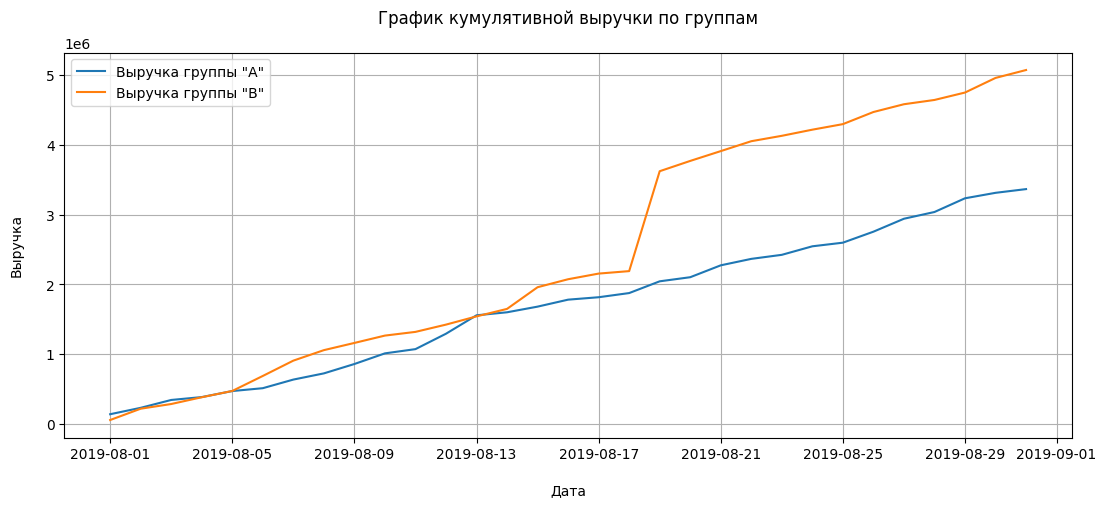

In [28]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# задаем размер графика
plt.figure(figsize=(13,5))

# cтроим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Выручка группы "A"')

# cтроим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Выручка группы "B"')

# добавляем форматирование
plt.title('График кумулятивной выручки по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Выручка\n')
plt.grid()
plt.legend();

**Краткие выводы:**

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак. При этом 19 августа в группе "B" наблюдается резкий скачок выручки, что может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке в группе "В".

#### График кумулятивного среднего чека по группам

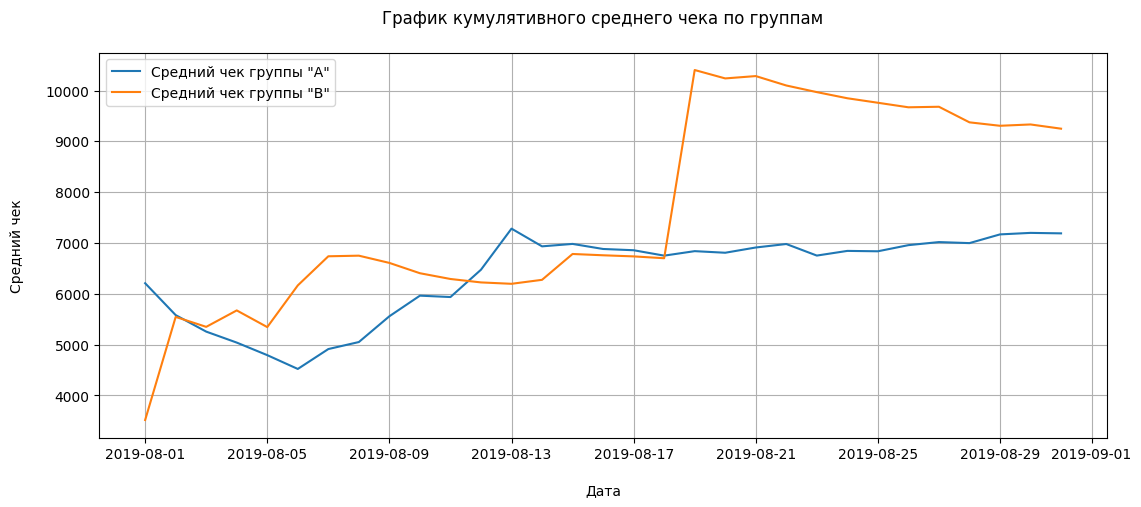

In [29]:
# задаем размер графика
plt.figure(figsize=(13,5))

# построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Средний чек группы "A"')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Средний чек группы "B"')

# добавляем форматирование
plt.title('График кумулятивного среднего чека по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Средний чек\n')
plt.grid()
plt.legend();

**Краткие выводы:**

И хотя средний чек имеет явные колебания в начале теста, можно сказать что средний чек обеих групп также стремится к равновесию. При этом 19 августа наблюдается резкое увеличение суммы среднего чека в группе "В". Значит дело все же в увеличении суммы конкретных заказов, а не их числа. Важно заметить что несмотря на этот всплеск, после него кумулятивная сумма среднего чека в группе "B" начинает снижаться, что позволяет нам говорить о том, что на длительной дистанции средние чеки групп "А" и "В" придут к равновесию. То есть резкий рост среднего чека группы "B" можно назвать случайным.

#### График относительного изменения кумулятивного среднего чека группы B к группе A

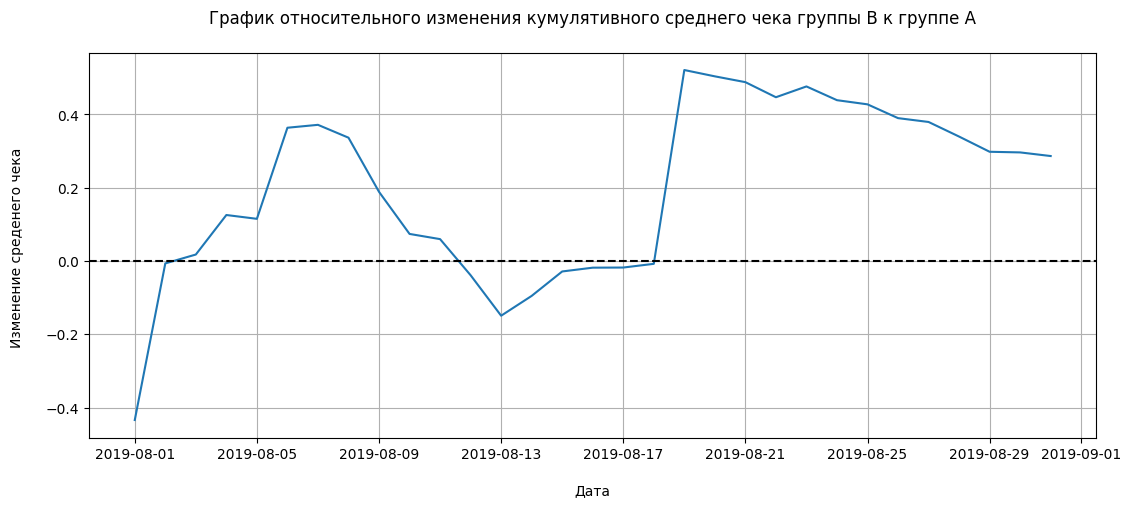

In [30]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (
    cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

# задаем размер графика
plt.figure(figsize=(13,5))

# строим график относительного изменения кумулятивного среднего чека группы B к группе A
(
    plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
    (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

# добавляем форматирование
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A\n  ')
plt.xlabel('\nДата')
plt.ylabel('Изменение среденего чека \n')
plt.grid();

**Краткие выводы:**

В нескольких точках график различия между сегментами резко «скачет». Это только подтверждает наличие в данных аномальных значений. Резкое колебание 19 августа не позволяет сформировать однозначные выводы.

#### График кумулятивной конверсии (кумулятивного среднего количества заказов на посетителя) по группам 

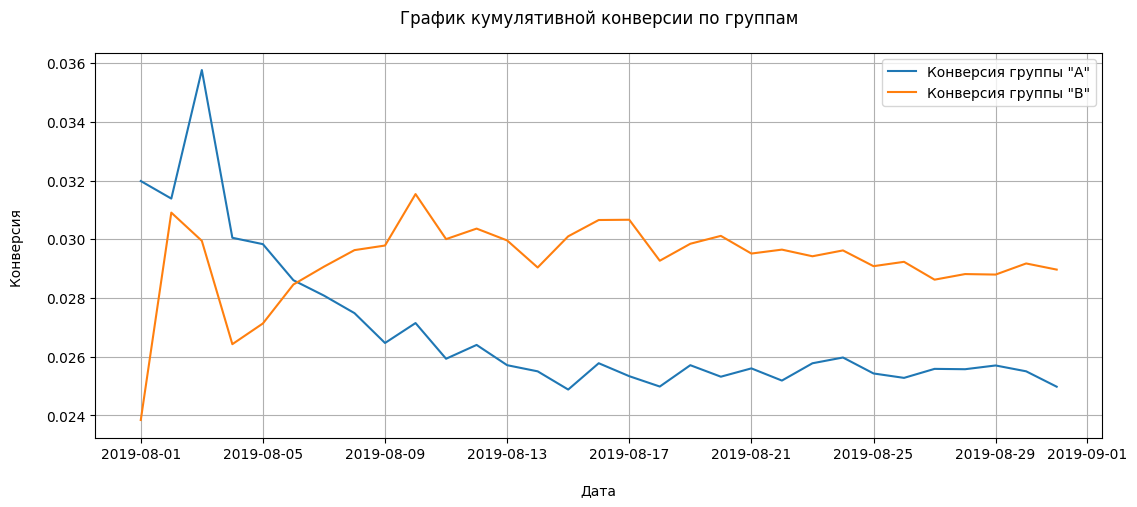

In [31]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# задаем размер графика
plt.figure(figsize=(13,5))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Конверсия группы "A"')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Конверсия группы "B"')

# добавляем форматирование
plt.title('График кумулятивной конверсии по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Конверсия \n')
plt.grid()
plt.legend();

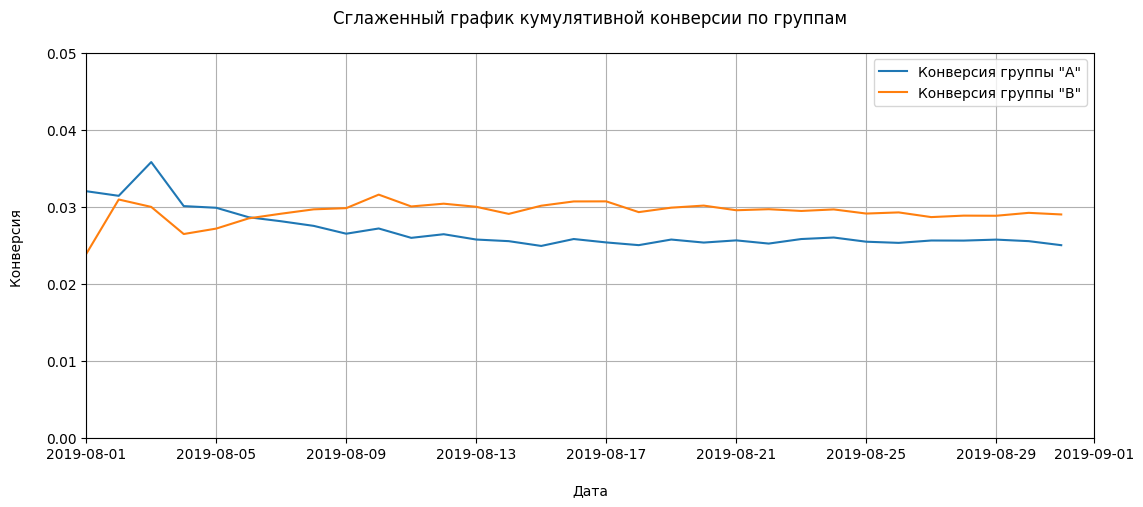

In [32]:
# задаем размер графика
plt.figure(figsize=(13,5))

# строим сглаженные графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Конверсия группы "A"')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Конверсия группы "B"')

# добавляем форматирование
plt.title('Сглаженный график кумулятивной конверсии по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Конверсия \n')
plt.grid()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.legend();

**Краткие выводы:**

Конверсия Группы "A" изначально была значительно выше чем у группы "B", но конверсия группы "A" с самого начала теста стабильно снижается, вплоть до 14-15 августа после чего остается на примерно одном уровне - 0,025. Конверсия группы "B" с начала теста увеличивалась и зафиксировалась на уровне примено 0,030-0,029 и с редкими колебаниями но все же немного продолжает незначительно снижаться.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя(конверсии) группы B к группе A

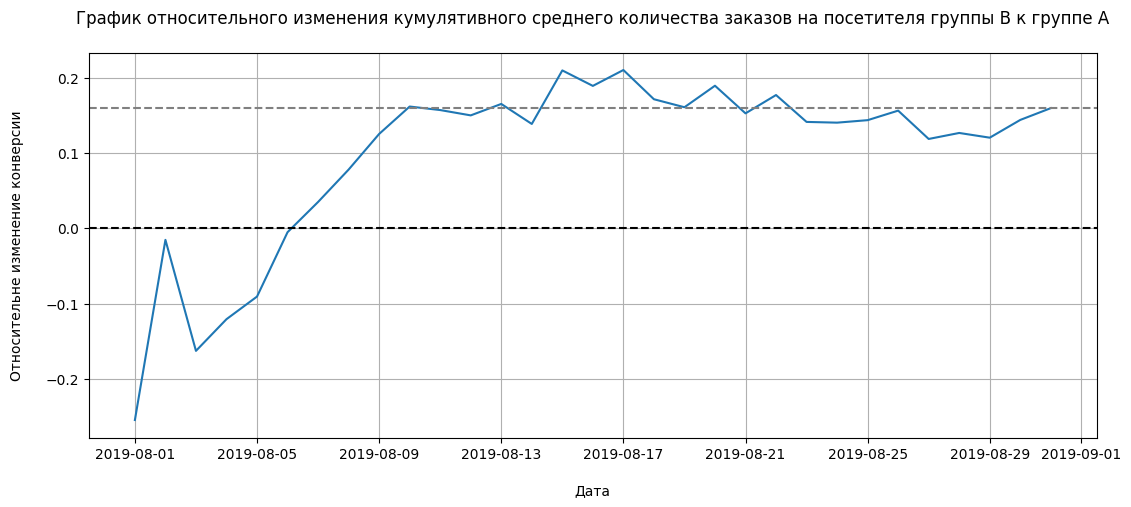

In [33]:
# задаем размер графика
plt.figure(figsize=(13,5))

# собираем данные в одном датафрейме
mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

# строим графики
(
    plt.plot(
    mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
    mergedCumulativeConversions['conversionA']-1)
)

# добавляем форматирование
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A\n ')
plt.xlabel('\nДата')
plt.ylabel('Относительне изменение конверсии\n')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.grid();

**Краткие выводы:**

Cреднее количество заказов на посетителя для группы "B" относительно группы "А" с небольшой просадкой в начале постепенно растет и с 10го августа с небольшими колебаниями держится на уровнее примерно 116% от группы "A". 16% - довольно значительный результат.

Резкие колебания на изученных графиках свидетельствуют о наличии в данных аномальных значений. Далее изучим данные подробнее и постараемся найти эти аномальные значения.

#### Точечный график количества заказов по пользователям

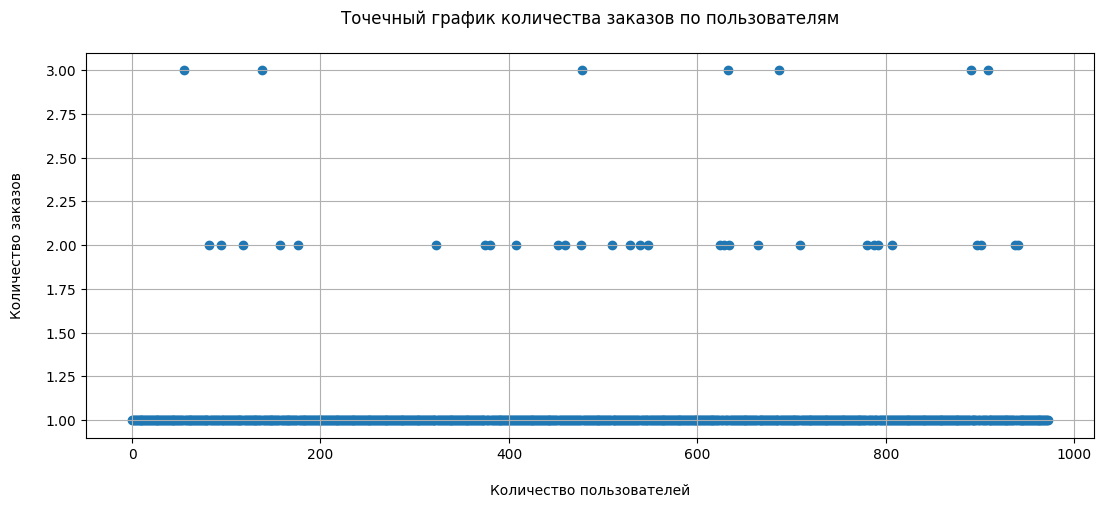

In [34]:
# подсчитаем количество заказов по пользователям и посмотрим на результат
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

# переименуем столбцы
ordersByUsers.columns = ['visitor_id', 'orders']

# строим график
plt.figure(figsize=(13,5))
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям\n  ')
plt.xlabel('\nКоличество пользователей')
plt.ylabel('Количество заказов\n')
plt.grid();

**Краткие выводы:**

Большинство наших пользователей совершают как правило всего 1 покупку, намного реже 2 покупки и совсем единицы совершают 3 покупки. 

**В рамках дополнительной проверки:**

Проверим пользователей, которые попали в обе группы по их количеству заказов.

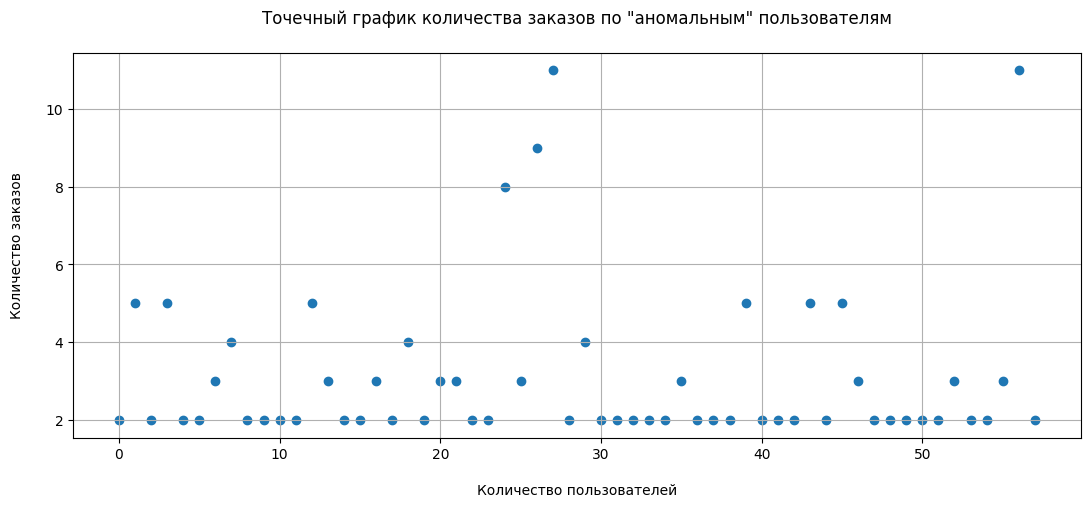

In [35]:
# подсчитаем количество заказов по 'аномальным' пользователям и посмотрим на результат
un_ordersByUsers = (
    un_orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

# переименуем столбцы
un_ordersByUsers.columns = ['visitor_id', 'orders']

# строим график
plt.figure(figsize=(13,5))
x_values = pd.Series(range(0,len(un_ordersByUsers)))
plt.scatter(x_values, un_ordersByUsers['orders'])
plt.title('Точечный график количества заказов по "аномальным" пользователям\n  ')
plt.xlabel('\nКоличество пользователей')
plt.ylabel('Количество заказов\n')
plt.grid();

Действительно, пользователи, которые попали в обе группы совершают больше заказов чем основная масса, но все же и там и там есть пользователи, которые совершили 2 покупки. Сложно однозначно утверждать что пользователи с 2мя покупками - это выбросы. Возможно необходимо уведомить коллег разработчиков о том что, может быть, алгоритм распределения посетителей для A/B-тестирования работает не совсем так как планировалось изначально.

**Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Определим границу для определения аномальных пользователей**

С помощью метода `np.percentile()` найдем перцентили количества заказов на пользователя

In [36]:
# 95- и 99-перцентили количества заказов на пользователя
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей оформили больше чем 1 заказ. И 1% пользователей заказывали более двух раз.

Дополнительно изучим 90-, 95- и 99-перцентили количества заказов на пользователя если бы все пользователи были распределены корректно.

In [37]:
# 90-, 95- и 99-перцентили количества заказов на пользователя
np.percentile(pd.concat([ordersByUsers, un_ordersByUsers])['orders'], [90, 95, 99])

array([1., 2., 4.])

Теперь уже не более 10% пользователей оформили больше чем 1 заказ, 5% пользователей заказывали более двух раз и 1% пользователей заказывали более четырех раз. 

Нельзя сказать что ситуация изменилась кардинально, но все равно есть что оптимизировать и на что обратить внимание при подготовке к проведению A/B-тестов в будущем.

#### Точечный график стоимостей заказов

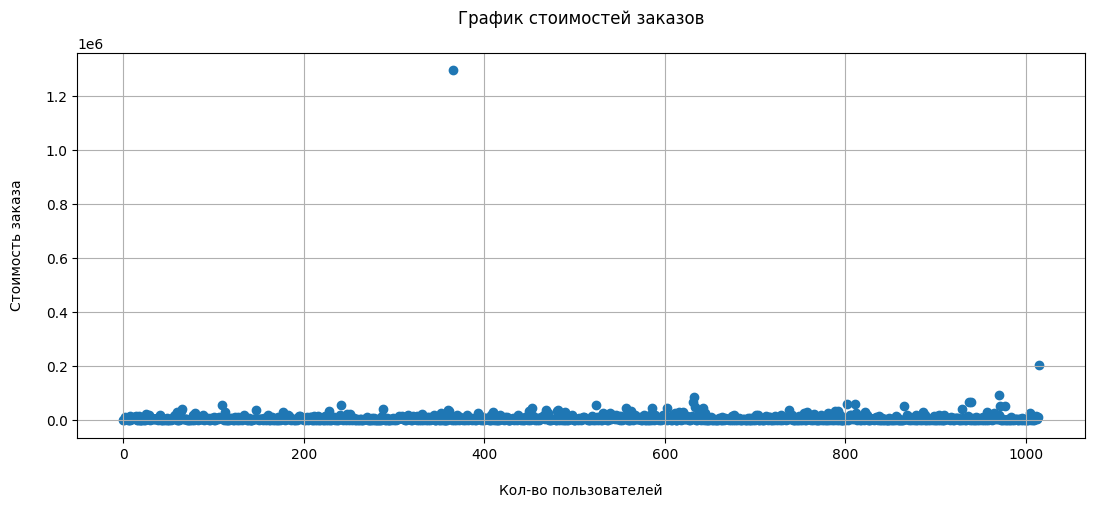

In [38]:
# строим график
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(13,5))
plt.grid()
plt.title('График стоимостей заказов\n ')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Стоимость заказа\n')
plt.scatter(x_values, orders['revenue']);

**Краткие выводы:**

Как и предполагалось ранее в данных есть анамально дорогие заказы.

In [39]:
# посмотрим подробнее на топ-10 самых дорогих заказов
orders['revenue'].sort_values(ascending=False).head(10)

425     1294500
1196     202740
1136      92550
744       86620
743       67990
1103      66350
1099      65710
949       60450
940       58550
131       53904
Name: revenue, dtype: int64

Заказ стоимостью 1 294 500, значительно выделяется из общей массы заказов. Скорее всего это тот самый заказ, который поспособствовал резкому росту выручки и среднего чека группы "B" 19 августа.

In [40]:
# проверяем
orders.loc[425, ['date', 'group']]

date     2019-08-19 00:00:00
group                      B
Name: 425, dtype: object

Так и есть. Очевидно аномальное значение

**Посчитаем 95-й и 99-й перцентили стоимости заказов. Определим границу для определения аномальных заказов**

In [41]:
# 95- и 99-перцентили стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов дороже чем на 26 785 у.е. И 1% пользователей тратили на заказ больше 53 904 у.е.

Дополнительно изучим 90-, 95- и 99-перцентили суммы заказов если бы все пользователи были распределены корректно.

In [42]:
# 90-, 95- и 99-перцентили количества заказов на пользователя
np.percentile(pd.concat([orders, un_orders])['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Значения перцентилей ожидаемо незначительно больше. 

#### Статистическая значимость различий в среднем количестве заказов на посетителя(конверсии) между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Начнём с подготовки данных:

In [43]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

pd.set_option('display.max_columns', None)
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


**Опишем данные:**

- `date` — дата


- `ordersPerDateA` — количество заказов в выбранную дату в группе A


- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A


- `ordersPerDateB` — количество заказов в выбранную дату в группе B


- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B


- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A


- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A


- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B


- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B


- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A


- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B


- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A


- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B


Теперь мы сможем посчитать статистическую значимость различия в среднем количестве заказов между группами.
Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['visitor_id', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [44]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

И сформулируем гипотезы. 

- Нулевая(**H0**): различий в среднем количестве заказов между группами нет. 
- Альтернативная(**H1**): различия в среднем между группами есть.

Статистическая значимость - 5%

In [45]:
sampleA = (
    pd.concat([ordersByUsersA['orders'],
    pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
    name='orders')],axis=0)
)

sampleB = (
    pd.concat([ordersByUsersB['orders'],
    pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
    name='orders')],axis=0)
)
print(f"P-value = {stats.mannwhitneyu(sampleA, sampleB)[1]:.3f}"
      f"\nОтносительный прирост конверсии группы B = {(sampleB.mean() / sampleA.mean() - 1)*100:.3f}%")

P-value = 0.011
Относительный прирост конверсии группы B = 15.980%


In [46]:
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

**Краткие выводы:**

При статистической значимости 5%(0.05) - p-value меньше этого значения. Поэтому нулевую гипотезу отвергаем, что дает нам основание говорить что различия в среднем количестве заказов на посетителя(конверсии) между группами по «сырым» данным есть.

Однако P-value достаточно низок и при статистической значимости в 1% нулевую гипотезу мы не смогли бы отвергнуть.

Относительный прирост конверсии группы "B" относительно группы "A" ~ 16%. Существенный прирост конверсии явно предрекает победу группы "B" в тесте.

#### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 

- Нулевая гипотеза(**H0**): различий в среднем чеке между группами нет. 
- Альтернативная гипотеза(**H1**): различия в среднем чеке между группами есть.

Статистическая значимость - 5%

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию `mannwhitneyu()` данные о выручке с заказов.

А ещё найдём относительные различия в среднем чеке между группами:

In [47]:
print(f"P-value = "
      f"{stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]:.3f}"
      f"\nОтносительный прирост суммы среднего чека группы B = "
      f"{(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)*100:.3f}%")

P-value = 0.829
Относительный прирост суммы среднего чека группы B = 28.660%


**Краткие выводы:**

Полученное значение p-value говорит о том, что хотя средние чеки исследуемых групп ("А" и "В") и неодинаковые, с вероятностью в 82,9% наблюдаемое различие в средних чеках или большее можно получить случайно из-за ошибки случайной выборки. Вероятность 82,9% слишком высокая чтобы делать вывод о значимом различии в средних чеках, поэтому нулевую гипотезу мы отвергнуть не можем. Есть основания говорить что значимых различий в средних чеках разных групп по "сырым" данным - нет.

При этом относительный прирост суммы среднего чека группы "B" относительно группы "A" по "сырым" данным практически 29%, что довольно много, но не стоит забывать о наличии аномальных заказов в группе "В".

#### Статистическая значимость различий в среднем количестве заказов на посетителя(конверсии) между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 54 000 у.е. Так мы уберём меньше 1% пользователей с наибольшим числом заказов и меньше 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 54 000 у.е. — `usersWithExpensiveOrders`. 

Объединим их в таблице `abnormalUsers`. 

Узнаем, сколько всего аномальных пользователей атрибутом `shape`.

In [48]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 54000]['visitor_id']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display(abnormalUsers.head())
print(abnormalUsers.shape[0])

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitor_id, dtype: int64

16


Всего 16 аномальных пользователей. 

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. 

Сформулируем гипотезы:

- Нулевая(**H0**): различий в среднем количестве заказов между группами нет. 
- Альтернативная(**H1**): различия в среднем между группами есть.

Статистическая значимость - 5%

Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [49]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print(f"P-value = {stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]:.3f}"
      f"\nОтносительный прирост конверсии группы B = {(sampleBFiltered.mean() / sampleAFiltered.mean() - 1)*100:.3f}%")

P-value = 0.007
Относительный прирост конверсии группы B = 18.921%


**Краткие выводы:**

Получить наблюдаемое различие в конверсии или большее можно получить случайно из-за ошибки случайной выборки всего в 0.7% случаев. При статистической значимости 5%(0.05) - p-value меньше этого значения. Поэтому нулевую гипотезу отвергаем, что дает нам основание говорить что различия в среднем количестве заказов на посетителя(конверсии) между группами по очищенным данным есть.

При этом относительный прирост конверсии группы "B" по сравнению с группой "А" - внушительные 19%. 

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Произошло ли что-нибудь с результатами по среднему чеку?

Проверим статистическую значимость различий в среднем чеке между сегментами.

- Нулевая гипотеза(**H0**): различий в среднем чеке между группами нет.
- Альтернативная гипотеза(**H1**): различия в среднем чеке между группами есть.

Статистическая значимость - 5%

In [50]:
P_value = (
    stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', 
    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'], 
    orders[np.logical_and(orders['group'] == 'B', 
    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
    )]['revenue'],)[1]
)

delta = (
    orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitor_id']
    .isin(abnormalUsers)),)]['revenue'].mean()/orders[np.logical_and(orders['group'] == 'A',
    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'].mean() - 1
    )

print(f"P-value = {P_value:.3f}"
      f"\nОтносительный прирост суммы среднего чека группы B = {delta*100:.3f}%")

P-value = 0.788
Относительный прирост суммы среднего чека группы B = -3.234%


Как и ранее полученное значение p-value говорит о том, что хотя средние чеки исследуемых групп ("А" и "В") и неодинаковые, с большой вероятностью (по очищенным данным - это 78.8%) наблюдаемое различие в средних чеках или большее можно получить случайно из-за ошибки случайной выборки. Есть основания говорить что значимых различий в средних чеках разных групп по очищенным данным - нет.

Из-за того что мы избавились от влияния аномальных значений - относительный прирост суммы среднего чека группы "B" относительно группы "A" по очищенным данным стал -3.2%.

## Выводы

**Объеденив результаты оценок гипотез фрейморками ICE и RICE можно выделить следующую приоритезацию гипотез:**

- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"


- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"


- "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"


- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"


- "Запустить акцию, дающую скидку на товар в день рождения"

**По результатам A/B-тестирования:**
- В наше распоряжение поступили датасеты `orders`, который хранит информацию о заказах в указанной группе A/B-теста, и  `visitors`, который хранит количество пользователей в указанной группе A/B-теста


- В данных пропуски не обнаружены


- Приведено описание всех данных представленных в датасетах


- Ошибок в данных не обнаружено

**В ходе анализа результатов A/B-тестирования:**
- Расчитаны кумулятивные показатели
    - Кумулятивная выручка
    - Кумулятивный средний чек
    - Кумулятивная конверсия (кумулятивное среднее количество заказов на посетителя)


**С помощью визуализаций получены следующие выводы:**
   - Выручка почти равномерно увеличивается в течение всего теста. При этом 19 августа в группе "B" наблюдается резкий скачок выручки это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке в группе "В"
   
   
   - Средний чек имеет явные колебания в начале теста, можно сказать что средний чек обеих групп также стремится к равновесию. При этом 19 августа наблюдается резкое увеличение суммы среднего чека в группе "В". Важно заметить что несмотря на этот всплеск, после него кумулятивная сумма среднего чека в группе "B" начинает снижаться, что позволяет нам говорить о том, что на длительной дистанции средние чеки групп "А" и "В" придут к равновесию. То есть резкий рост среднего чека группы "B" можно назвать случайным


   - Конверсия группы "A" изначально была значительно выше чем у группы "B", но конверсия группы "A" с самого начала теста стабильно снижается, вплоть до 14-15 августа после чего остается на примерно одном уровне - 0,025. Конверсия группы "B" с начала теста увеличивалась и зафиксировалась на уровне примено 0,030-0,029 и с редкими колебаниями но все же немного продолжает незначительно снижаться
   
   
   - Cреднее количество заказов на посетителя для группы "B" относительно группы "А" с небольшой просадкой в начале постепенно растет и с 10го августа с небольшими колебаниями держится на уровнее примерно 116% от группы "A". 16% - довольно значительный результат
   
   
   - Большинство наших пользователей совершают как правило всего 1 покупку, намного реже 2 покупки и совсем единицы совершают 3 покупки
   
   
   - Подтверждено, что в данных есть аномально дорогие заказы
   
   
   - Граница для определения аномальных пользователей по количеству заказов - более 2х заказов
   
   
   - Граница для определения аномальных заказов по сумме - более 54 000 у.е.
    
    
**С помощью U-критерия Манна-Уитни был проверен ряд гипотез. Проверены относительные показатели конверсии и суммы среднего чека для разных групп и получены следующие результаты:**

   - Различия в среднем количестве заказов на посетителя(конверсии) между группами по «сырым» данным есть


   - Относительный прирост конверсии группы "B" относительно группы "A" + 15.98%
   
   
   - Значимых различий в средних чеках разных групп по "сырым" данным нет
   
   
   - Относительный прирост суммы среднего чека группы "B" относительно группы "A" по "сырым" данным + 28.66%
   
   
   - Различия в среднем количестве заказов на посетителя(конверсии) между группами по очищенным данным есть
   
   
   - Относительный прирост конверсии группы "B" по сравнению с группой "А" + 18.92%
   
   
   - Значимых различий в средних чеках разных групп по очищенным данным нет
   
   
   - Относительный прирост суммы среднего чека группы "B" относительно группы "A" по очищенным данным - 3.2%

## Рекомендации

**Учитывая, что:**


- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.


- Нет статистически значимого различия по среднему чеку между группами и по сырым данным и по очищенным.


- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: зафиксировались около среднего значения.


- Относительный присрост конверсии посетителей в группе B больше конверсии посетителей в группе A от +15.98% (по сырым данным) до +18.92% (по очищенным данным)

**Рекомендуем:**
- Остановить тест, признать его успешным в пользу группы B и перейти к проверке следующей гипотезы